In [5]:
from google.colab import files
uploaded = files.upload()


Saving house_price_cleaned.csv to house_price_cleaned.csv


In [6]:
import pandas as pd
df = pd.read_csv("house_price_cleaned.csv")
df.head()


,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,zipcode
0,1,126958.0,2.0,3.000000,4933,6222,2,0,3,Fair,98103
1,2,676155.0,2.0,3.000000,4277,6315,1,0,1,Poor,98103
2,3,136932.0,4.0,2.021053,3369,5869,1,0,3,Good,98102
3,4,370838.0,4.0,1.000000,3734,1876,1,1,3,Poor,98104
4,5,264178.0,1.0,1.000000,4291,8027,2,0,3,Poor,98104


In [7]:
X = df.drop("price", axis=1)
y = df["price"]


In [8]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [10]:
df.dtypes


,0
id,int64
price,float64
bedrooms,float64
bathrooms,float64
sqft_living,int64
sqft_lot,int64
floors,int64
waterfront,int64
view,int64
condition,object


In [16]:
df = pd.get_dummies(df, drop_first=True)


In [18]:
df_encoded.columns


Index(['id', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'zipcode', 'condition_Fair',
       'condition_Good', 'condition_Poor'],
      dtype='object')

In [19]:
X = df_encoded.drop("price", axis=1)
y = df_encoded["price"]


In [20]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [22]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)


In [23]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(32, activation='relu'),
    Dense(1)  # price prediction → 1 output
])


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [24]:
model.compile(
    optimizer='adam',
    loss='mse',
    metrics=['mae', 'mse']
)


In [25]:
history = model.fit(
    X_train, y_train,
    validation_split=0.1,
    epochs=50,
    batch_size=32,
    verbose=1
)


Epoch 1/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 244ms/step - loss: 287537758208.0000 - mae: 464640.6875 - mse: 287537758208.0000 - val_loss: 519514488832.0000 - val_mae: 668376.2500 - val_mse: 519514488832.0000
Epoch 2/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step - loss: 283503755264.0000 - mae: 463816.0625 - mse: 283503755264.0000 - val_loss: 519514292224.0000 - val_mae: 668376.0625 - val_mse: 519514292224.0000
Epoch 3/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - loss: 304900702208.0000 - mae: 480662.5312 - mse: 304900702208.0000 - val_loss: 519514030080.0000 - val_mae: 668375.8750 - val_mse: 519514030080.0000
Epoch 4/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - loss: 299233640448.0000 - mae: 479389.3125 - mse: 299233640448.0000 - val_loss: 519513767936.0000 - val_mae: 668375.6875 - val_mse: 519513767936.0000
Epoch 5/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - loss: 281203834880.0000 - mae: 457709.9062 - mse: 281203834880.0000 - val_loss: 519513505792.0000 - val_mae: 668375.5625 - val_mse: 519513505792

In [26]:
test_loss, test_mae, test_mse = model.evaluate(X_test, y_test)

print("MAE:", test_mae)
print("MSE:", test_mse)
print("RMSE:", test_mse ** 0.5)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - loss: 217376325632.0000 - mae: 388929.8125 - mse: 217376325632.0000
MAE: 388929.8125
MSE: 217376325632.0
RMSE: 466236.3409602473


In [27]:
y_pred_ann = model.predict(X_test[:5])
print("Predicted prices:", y_pred_ann.flatten())
print("Actual prices:", y_test[:5].values)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 127ms/step
Predicted prices: [54.548435 48.127083 46.40718  39.29828  57.593086]
Actual prices: [901942. 324030. 703361. 653143. 532035.]


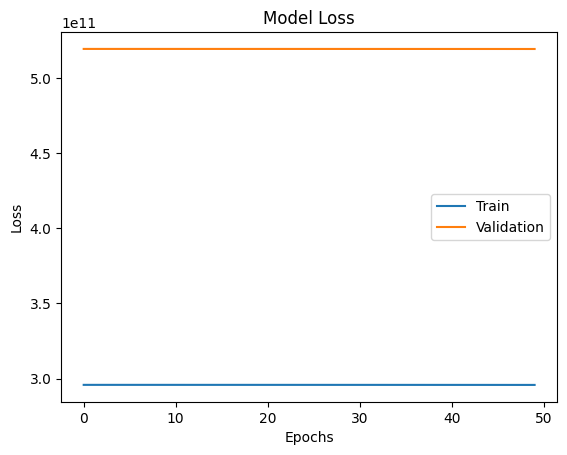

In [28]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['Train', 'Validation'])
plt.show()
